In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

In [2]:
from statsmodels.tsa.stattools import adfuller

In [3]:
def df_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    pval = dfoutput['p-value']
    print(f'Result: The series is {"not " if pval > 0.05 else ""}stationary')

In [4]:
client = str(input("Enter Client Name : "))
le = str(input("Enter Legal Entity (eg. CitiBank Pune) : "))
df = pd.read_csv(r'C:\Users\OINDREELA\Documents\GitHub\TimeSeriesPrediction\dataset.csv', parse_dates = ['Date'], index_col = 'Date')
ts = df[(df['Client Name'] == client) & (df['Legal Entity'] == le)]['Net Amount']

Enter Client Name : HSBC
Enter Legal Entity (eg. CitiBank Pune) : CitiBank Pune


In [5]:
ts.min()

-75391

**The BoxCox transformation**

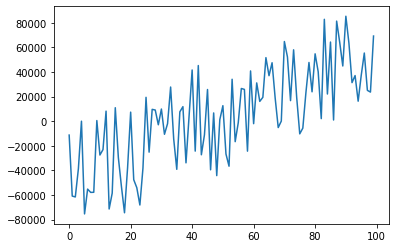

In [6]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
y,fitted_lambda= boxcox(ts + 100000, lmbda=None) # ts + 100000 to make input positive
bxcx = inv_boxcox(y,fitted_lambda)
bxcx -= 100000
plt.plot(bxcx)
plt.show()

In [7]:
df_test(pd.Series(bxcx))

Results of Dickey-Fuller Test:
Test Statistic                 -1.360785
p-value                         0.600925
#Lags Used                      4.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64
Result: The series is not stationary


**Seasonal Decomposition**

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

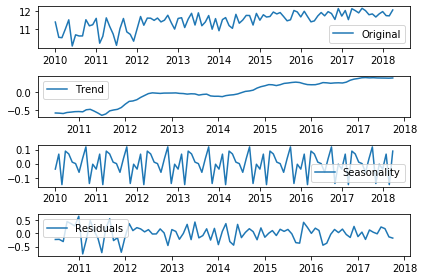

In [9]:
ts_log = np.log(ts + 100000)
#ts_log.dropna(inplace=True)
#print(len(ts_log))
decomposition = seasonal_decompose(ts_log - np.log(100000)) #approx scaling down
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
#print(len(residual.dropna()))
#decomposition.plot()
plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [10]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
df_test(ts_log_decompose)

Results of Dickey-Fuller Test:
Test Statistic                -7.091811e+00
p-value                        4.390499e-10
#Lags Used                     3.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (5%)           -2.896616e+00
Critical Value (10%)          -2.585482e+00
dtype: float64
Result: The series is stationary


BoxCox didn't work that's why used residuals to convert to a stationary time series